<a href="https://colab.research.google.com/github/llwusill/NLPbadWords/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer
from snowballstemmer import TurkishStemmer
import nltk
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True



```python
('/content/drive/MyDrive/NLP') #bu kısımda kendi klasörüne yönlendirmen lazım.
```



In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/NLP'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/NLP/deneme.csv
/content/drive/MyDrive/NLP/tweetset.csv
/content/drive/MyDrive/NLP/newcsv.csv




```python
("/content/drive/MyDrive/NLP/tweetset.csv") #aynı şekilde bu kısım içinde geçerli
```



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP/tweetset.csv",encoding="windows-1254")
df.head()

,Tip,Paylaşım,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Negatif,Doğa ağzımıza sıçsa hakkı var,NaN,NaN,NaN,NaN
1,Pozitif,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",NaN,NaN,NaN,NaN
2,Negatif,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,NaN,NaN,NaN,NaN
3,Negatif,Köpeğim suratına sıçsın senin namussuz karı,NaN,NaN,NaN,NaN
4,Negatif,"Ben söğüşledim, birazda sen söğüşle",NaN,NaN,NaN,NaN


In [ ]:
# Veri setinde kayıp verilerin olup olmadığına bakıyoruz ve düzeltilemeyecek kadar olan feature'leri siliyoruz
print("Kayıp Veriler :{}".format(df.isnull().sum()))

Kayıp Veriler :Tip               0
Paylaşım          0
Unnamed: 2    11109
Unnamed: 3    11111
Unnamed: 4    11110
Unnamed: 5    11110
dtype: int64


In [ ]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5"],axis=1,inplace=True)

In [ ]:
#Label encoder işlemi yaparak veri seti içerisinde bulunan "Negatif" değerli 0 "Pozitif" değerleri ise 1 yapıyoruz.
df["sınıf"] = [0 if (i=="Negatif") else 1 for i in df["Tip"]]
df.head()

,Tip,Paylaşım,sınıf
0,Negatif,Doğa ağzımıza sıçsa hakkı var,0
1,Pozitif,"Anne bir sanatçıdır, en güzel eseri de yavrusu...",1
2,Negatif,ibrahimin oğlunu koruyan Tanrı’ya da ben sokayım,0
3,Negatif,Köpeğim suratına sıçsın senin namussuz karı,0
4,Negatif,"Ben söğüşledim, birazda sen söğüşle",0


In [ ]:
import string
import re
import nltk

# Özel karakterleri temizleme
def ozelkarakter_temizleme(metin):
    punctation = string.punctuation
    return metin.translate(str.maketrans("", "", punctation))

# Stopword temizleme
stopword = "acaba, ama, ancak, artık, asla, aslında, az,bana, bazen, bazı, bazıları, bazısı, belki, ben, beni, benim, beş, bile, bir, birçoğu, birçok, birçokları, biri, birisi, birkaç, birkaçı, birşey, birşeyi, biz, bize, bizi, bizim, böyle, böylece, bu, buna, bunda, bundan, bunu, bunun, burada, bütün,çoğu, çoğuna, çoğunu, çok, çünkü,da, daha, de, değil, demek, diğer, diğeri, diğerleri, diye, dolayı,elbette, en,fakat, falan, felan, filan, gene, gibi,hangi, hangisi, hani, hatta, hem, henüz, hep, hepsi, hepsine, hepsini, her, her biri, herkes, herkese, herkesi, hiç, hiç kimse, hiçbiri, hiçbirine, hiçbirini,için, içinde, ile, ise, işte,kaç, kadar, kendi, kendine, kendini, ki, kim, kime, kimi, kimin, kimisi,madem, mı, mi, mu, mü,nasıl, ne, ne kadar, ne zaman, neden, nedir, nerde, nerede, nereden, nereye, nesi, neyse, niçin, niye,ona, ondan, onlar, onlara, onlardan, onların, onu, onun, orada, oysa, oysaki,öbürü, ön, önce, ötürü, öyle, sana, sen, senden, seni, senin, siz, sizden, size, sizi, sizin, son, sonra, seobilog,şayet, şey, şimdi, şöyle, şu, şuna, şunda, şundan, şunlar, şunu, şunun,tabi, tamam, tüm, tümü, üzere,var, ve, veya, veyahut,ya, ya da, yani, yerine, yine, yoksa,zaten, zira"
stopword = stopword.split(",")
def stopwords_temizleme(metin):
    return " ".join([kelime for kelime in str(metin).split() if kelime not in stopword])

# Sık kullanılan kelimeleri temizleme
count = Counter()
for metin in df["Paylaşım"].values:
    for kelime in metin.split():
        count[kelime] += 1
frekans = set([i for (i, j) in count.most_common(15)])
def frekans_sil(metin):
    return " ".join([kelime for kelime in str(metin).split() if kelime not in frekans])

# Kelime kökünü alma
snowBallStememr = TurkishStemmer()
def kelime_kök_alma(metin):
    wordlist = nltk.word_tokenize(metin)
    stemWords = [snowBallStememr.stemWord(kelime) for kelime in wordlist]
    return " ".join(stemWords)

# Emojileri silme
def emoji_silme(metin):
    emoji = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                       # Diğer emojileri buraya ekleyin
                       "]+", flags=re.UNICODE)
    return emoji.sub(r"", metin)

In [ ]:
df["Paylaşım"] = df["Paylaşım"].str.lower()
df["ozel_karaktersiz"] = df["Paylaşım"].apply(lambda metin: ozelkarakter_temizleme(metin))
df["stop_word"] = df["ozel_karaktersiz"].apply(lambda metin: stopwords_temizleme(metin))
df["sık_kullanılan"] = df["stop_word"].apply(lambda metin: frekans_sil(metin))
df["kelime_kok"] = df["sık_kullanılan"].apply(lambda kelime: kelime_kök_alma(kelime))
df["emojisiz"] = df["kelime_kok"].apply(lambda metin: emoji_silme(metin))
df.head(50)

,Tip,Paylaşım,sınıf,ozel_karaktersiz,stop_word,sık_kullanılan,kelime_kok,emojisiz
0,Negatif,doğa ağzımıza sıçsa hakkı var,0,doğa ağzımıza sıçsa hakkı var,doğa ağzımıza sıçsa hakkı,doğa ağzımıza sıçsa hakkı,dok ağz sıç hakkı,dok ağz sıç hakkı
1,Pozitif,"anne bir sanatçıdır, en güzel eseri de yavrusu...",1,anne bir sanatçıdır en güzel eseri de yavrusudur,anne bir sanatçıdır en güzel eseri de yavrusudur,anne sanatçıdır en güzel eseri yavrusudur,anne sanatçı en güzel eser yavrus,anne sanatçı en güzel eser yavrus
2,Negatif,ibrahimin oğlunu koruyan tanrı’ya da ben sokayım,0,ibrahimin oğlunu koruyan tanrı’ya da ben sokayım,ibrahimin oğlunu koruyan tanrı’ya ben sokayım,ibrahimin oğlunu koruyan tanrı’ya sokayım,ibrah oğl koruya tanrı ’ ya sok,ibrah oğl koruya tanrı ’ ya sok
3,Negatif,köpeğim suratına sıçsın senin namussuz karı,0,köpeğim suratına sıçsın senin namussuz karı,köpeğim suratına sıçsın senin namussuz karı,köpeğim suratına sıçsın senin namussuz karı,köpek surat sıç se namussuz kar,köpek surat sıç se namussuz kar
4,Negatif,"ben söğüşledim, birazda sen söğüşle",0,ben söğüşledim birazda sen söğüşle,ben söğüşledim birazda sen söğüşle,söğüşledim birazda sen söğüşle,söğüşledi biraz sen söğüş,söğüşledi biraz sen söğüş
5,Negatif,"şerefsizlik, sözde sanatçıların vazgeçemediği ...",0,şerefsizlik sözde sanatçıların vazgeçemediği b...,şerefsizlik sözde sanatçıların vazgeçemediği b...,şerefsizlik sözde sanatçıların vazgeçemediği d...,şerefsizlik söz sanatçı vazgeçemedik değer,şerefsizlik söz sanatçı vazgeçemedik değer
6,Negatif,kendisi de bilmiyordur çünkü beyinsiz,0,kendisi de bilmiyordur çünkü beyinsiz,kendisi de bilmiyordur çünkü beyinsiz,kendisi bilmiyordur çünkü beyinsiz,kendis bilmiyor çünkü beyinsiz,kendis bilmiyor çünkü beyinsiz
7,Negatif,"aşırı bıyıklı geleneksel keko adam, bi ayrılıp...",0,aşırı bıyıklı geleneksel keko adam bi ayrılıp ...,aşırı bıyıklı geleneksel keko adam bi ayrılıp ...,aşırı bıyıklı geleneksel keko adam bi ayrılıp ...,aşır bıyıklı geleneksel keko ada bi ayrılıp bi...,aşır bıyıklı geleneksel keko ada bi ayrılıp bi...
8,Pozitif,"en uzun yolculuklar bile, tek bir adımla başla...",1,en uzun yolculuklar bile tek bir adımla başlar...,en uzun yolculuklar bile tek bir adımla başlar...,en uzun yolculuklar bile tek adımla başlar gel...,en uz yolculuk bil tek ad baş gelecek mimar ge...,en uz yolculuk bil tek ad baş gelecek mimar ge...
9,Pozitif,vallahi bu aralar istediğimiz tek şey huzur,1,vallahi bu aralar istediğimiz tek şey huzur,vallahi bu aralar istediğimiz tek şey huzur,vallahi aralar istediğimiz tek şey huzur,vallahi ara istedik tek şey huzur,vallahi ara istedik tek şey huzur


In [ ]:
# Veri seti üzerinde gerçekleşen değişimleri gözlemleyebilmek için her bir işlemi farklı feature'ler oluşturarak yapmıştık.
# Şimdi ise işimize yaramayacak olan feature'leri siliyoruz
df.drop(["Paylaşım","ozel_karaktersiz","stop_word","sık_kullanılan","kelime_kok"],axis=1,inplace=True)
df.head()

,Tip,sınıf,emojisiz
0,Negatif,0,dok ağz sıç hakkı
1,Pozitif,1,anne sanatçı en güzel eser yavrus
2,Negatif,0,ibrah oğl koruya tanrı ’ ya sok
3,Negatif,0,köpek surat sıç se namussuz kar
4,Negatif,0,söğüşledi biraz sen söğüş


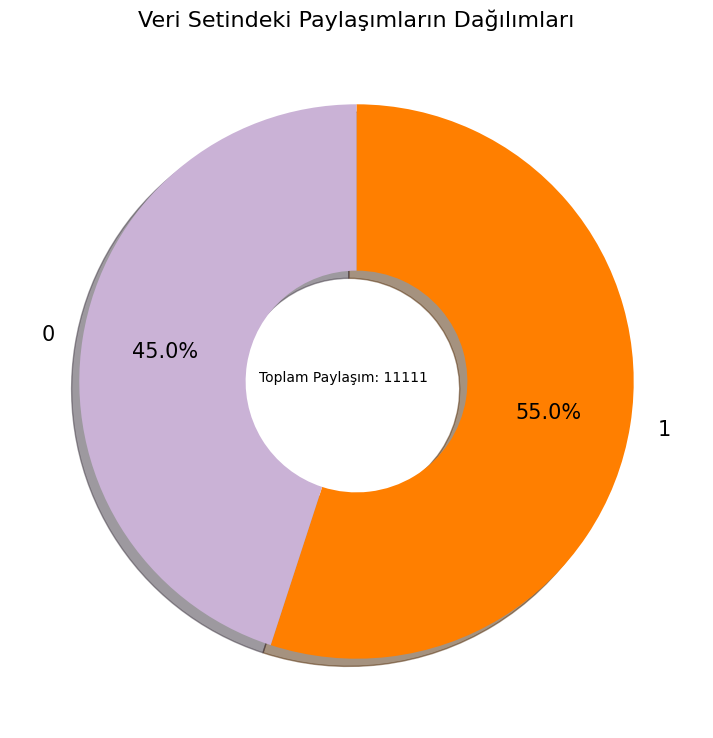

In [ ]:
plt.figure(figsize = (9,9))
sorted_counts = df['sınıf'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Toplam Paylaşım: {}'.format(df.shape[0]))
plt.title('Veri Setindeki Paylaşımların Dağılımları', fontsize = 16);

<Axes: ylabel='count'>

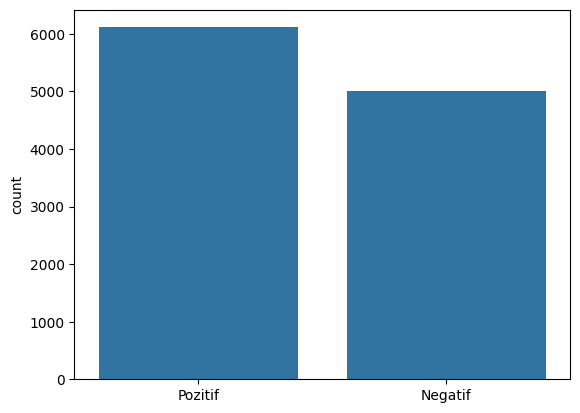

In [ ]:
sns.barplot(x=["Pozitif","Negatif"],y = df["sınıf"].value_counts())

<ipython-input-14-8f9498539300>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sınıf"] == 0]["karakter_len"].values, bins=20, label="Negatif değerlerinin histogram")
<ipython-input-14-8f9498539300>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sınıf"] == 1]["karakter_len"].val

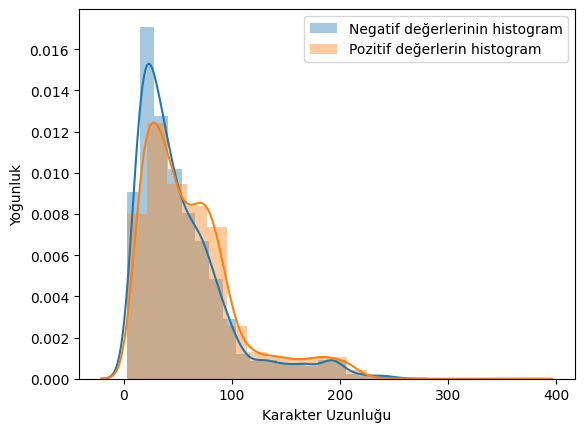

In [ ]:
df["karakter_len"] = df["emojisiz"].apply(len)
plt.figure("0-1 histogram grafiği")

sns.distplot(df[df["sınıf"] == 0]["karakter_len"].values, bins=20, label="Negatif değerlerinin histogram")
sns.distplot(df[df["sınıf"] == 1]["karakter_len"].values, bins=20, label="Pozitif değerlerin histogram")

plt.xlabel("Karakter Uzunluğu")
plt.ylabel("Yoğunluk")
plt.legend(loc="best")
plt.show()

<ipython-input-15-1db82b9f66d3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sınıf"]==0]["kelime"].values,bins=20,label="0 değeri için hist")
<ipython-input-15-1db82b9f66d3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sınıf"]==1]["kelime"].values,bins=20,label="1 değeri iç

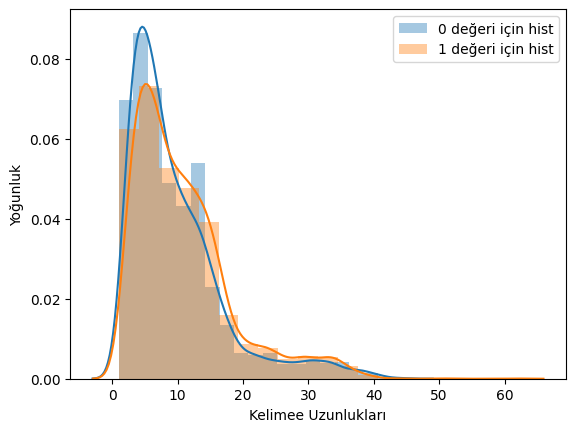

In [ ]:
df["kelime"] = df["emojisiz"].apply(lambda x : len(x.split()))

plt.figure("kelimelerin 0 ve 1 değerlerine göre kda sı")

sns.distplot(df[df["sınıf"]==0]["kelime"].values,bins=20,label="0 değeri için hist")
sns.distplot(df[df["sınıf"]==1]["kelime"].values,bins=20,label="1 değeri için hist")

plt.xlabel("Kelimee Uzunlukları")
plt.ylabel("Yoğunluk")
plt.legend(loc="best")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

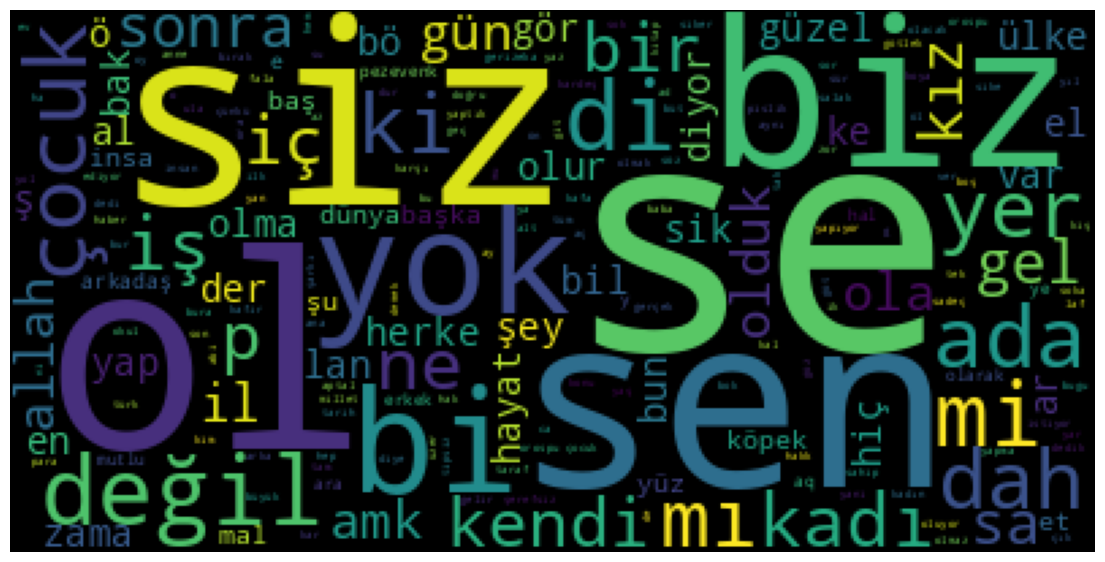

In [ ]:
metin = df.emojisiz.tolist()
metin_kombin = " ".join(metin)
plt.figure(figsize=(14,14))
plt.imshow(WordCloud().generate(metin_kombin))
plt.axis("off")

Text(0.5, 1.0, 'Pozitif Metin')

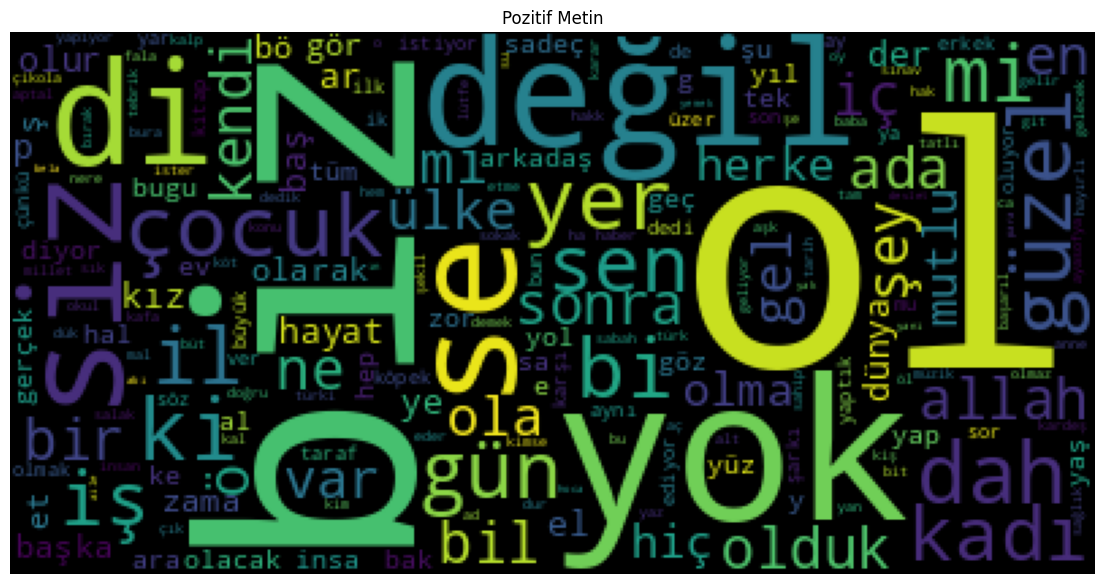

In [ ]:
# pozitif sınıflandırıcının görselleştirilmesi

pozitif = df.emojisiz[df.sınıf == 1]

pozitif_metin = pozitif.tolist()
pozitif_metin_ekleme = " ".join(pozitif_metin)
plt.figure(figsize=(14,14))
plt.imshow(WordCloud().generate(pozitif_metin_ekleme))
plt.axis("off")
plt.title("Pozitif Metin")

Text(0.5, 1.0, 'Negatif Metnin Dağılımı')

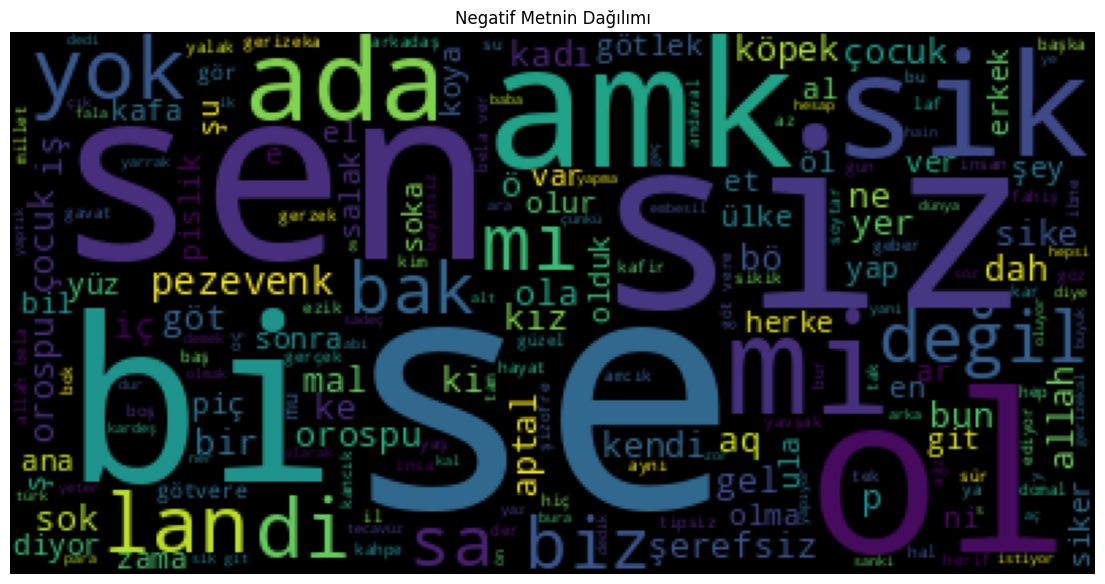

In [ ]:
# Negatif Metin içindeki en çok kullanılan kelimeler

negatif = df.emojisiz[df.sınıf==0]
negatif_metin= negatif.tolist()
negatif_metin_ekle = " ".join(negatif_metin)
plt.figure(figsize=(14,14))
plt.imshow(WordCloud().generate(negatif_metin_ekle))
plt.axis("off")
plt.title("Negatif Metnin Dağılımı")

###MODEL'in Train & Test kümelerine ayrımı

In [ ]:
train_size = int(len(df)*0.70)
test_size = int(len(df)-train_size)

print("Eğitim Boyutu=" ,train_size)
print("Test Boyutu=" ,test_size)

Eğitim Boyutu= 7777
Test Boyutu= 3334


In [ ]:
def df_split (df,train_size):
    train = df[:train_size]
    test= df[train_size:]
    return train,test
train_y,test_y = df_split(df["sınıf"],train_size)
train_x,test_x = df_split(df["emojisiz"],train_size)

###Sınıflandırma Algoritmalarının Denenmesi

In [ ]:
from sklearn.svm import SVC
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import joblib
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier



```
# Bu alttaki kısım deneysel ona bakacağım istediğim gibi olmadı**
```







In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

def predict_hate_speech_cv(data, vectorizer, model, k=5):
  """ K-Fold Cross Validation kullanarak hakaret algılama modeli eğitir ve tahmin yapar.

  Args:
      data: 'emojisiz' ve 'sınıf' sütunlarını içeren bir pandas DataFrame.
      vectorizer: Text vectorizer object.
      model: Machine learning model for classification.
      k: K-Fold cross validation için katlama sayısı (varsayılan 5).

  Returns:
      Ortalama tahmin doğruluğu skoru.
  """
  kf = KFold(n_splits=k, shuffle=True, random_state=42)

  accuracy_scores = []

  for train_index, test_index in kf.split(data):
    train_text = data['emojisiz'].iloc[train_index].values.astype('U')
    train_y = data['sınıf'].iloc[train_index].values.astype('U')
    test_text = data['emojisiz'].iloc[test_index].values.astype('U')
    test_y = data['sınıf'].iloc[test_index].values.astype('U')

    train_vectors = vectorizer.transform(train_text)

    model.fit(train_vectors, train_y)

    test_vectors = vectorizer.transform(test_text)

    predictions = model.predict(test_vectors)

    accuracy_score1 = accuracy_score(test_y, predictions)

    accuracy_scores.append(accuracy_score1)

  average_accuracy = np.mean(accuracy_scores)
  return average_accuracy

In [ ]:
cv_result=[]
stop_words = "english"
vectorizer = TfidfVectorizer(min_df=10, max_df=0.95, sublinear_tf=True, norm='l2',ngram_range=(1, 3), encoding='windows-1254', stop_words=stop_words, analyzer='word')
models = [('LogisticRegression', LogisticRegression(solver='newton-cg', multi_class='multinomial')),
          ('SVC', SVC(kernel = "rbf")),
          ('SGDClassifier', SGDClassifier(tol=1e-3, penalty='l2')),
          ("MultinomialNB",MultinomialNB()),
          ("RandomForestClassifier",RandomForestClassifier (random_state=16)),
          ("Bagging Classifier",BaggingClassifier()),
          ("DecisionTreeClassifier",DecisionTreeClassifier(random_state=16)),
          ("AdaBoostClassifier",AdaBoostClassifier()),
          ("KNeighborsClassifier",KNeighborsClassifier())
         ]
sonuc = {}
for name, model in models:

        sonuc.update({name : k_fold(vectorizer, model, df, name)})
        print("***************************** \n",sonuc)


NameError: name 'k_fold' is not defined

###Sonuç

In [ ]:
sozluk = list(sonuc.items())
visualDF = pd.DataFrame(sozluk, columns=["Model Adı", "Başarım Oranı"])
visualDF.head(9)

In [ ]:
visualDF.set_index('Model Adı', inplace=True)
visualDF['Başarım Oranı'] = visualDF['Başarım Oranı'].astype(float)

# HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(visualDF, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5)
plt.title('Model Başarı Oranları')
plt.xlabel('Model Adı')
plt.ylabel('Başarım Oranı')
plt.show()


#Bar Plot
visualDF.groupby('Model Adı')['Başarım Oranı'].mean().plot.bar()

In [ ]:
def basarım (sonuc):
    max_basarım = max(sonuc,key = sonuc.get)
    return (max_basarım)
print("Yapmış olduğumuz 9 farklı makine öğrenmesi algoritması arasında en başarılı sonucu veren algoritma = {} ' dir".format(basarım(sonuc)))